In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [5]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X.shape

(569, 30)

In [8]:
y.value_counts()

1    357
0    212
Name: count, dtype: int64

In [9]:
list(data.feature_names)[:10]

[np.str_('mean radius'),
 np.str_('mean texture'),
 np.str_('mean perimeter'),
 np.str_('mean area'),
 np.str_('mean smoothness'),
 np.str_('mean compactness'),
 np.str_('mean concavity'),
 np.str_('mean concave points'),
 np.str_('mean symmetry'),
 np.str_('mean fractal dimension')]

In [10]:
X.iloc[:, :6].describe().T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
mean radius,14.127292,3.524049,6.98100,28.1100
mean texture,19.289649,4.301036,9.71000,39.2800
mean perimeter,91.969033,24.298981,43.79000,188.5000
mean area,654.889104,351.914129,143.50000,2501.0000
mean smoothness,0.096360,0.014064,0.05263,0.1634
mean compactness,0.104341,0.052813,0.01938,0.3454


In [11]:
selected_features = [
    'mean radius',
    'mean texture',
    'mean perimeter',
    'mean smoothness',
    'mean compactness',
    'mean concavity'
]

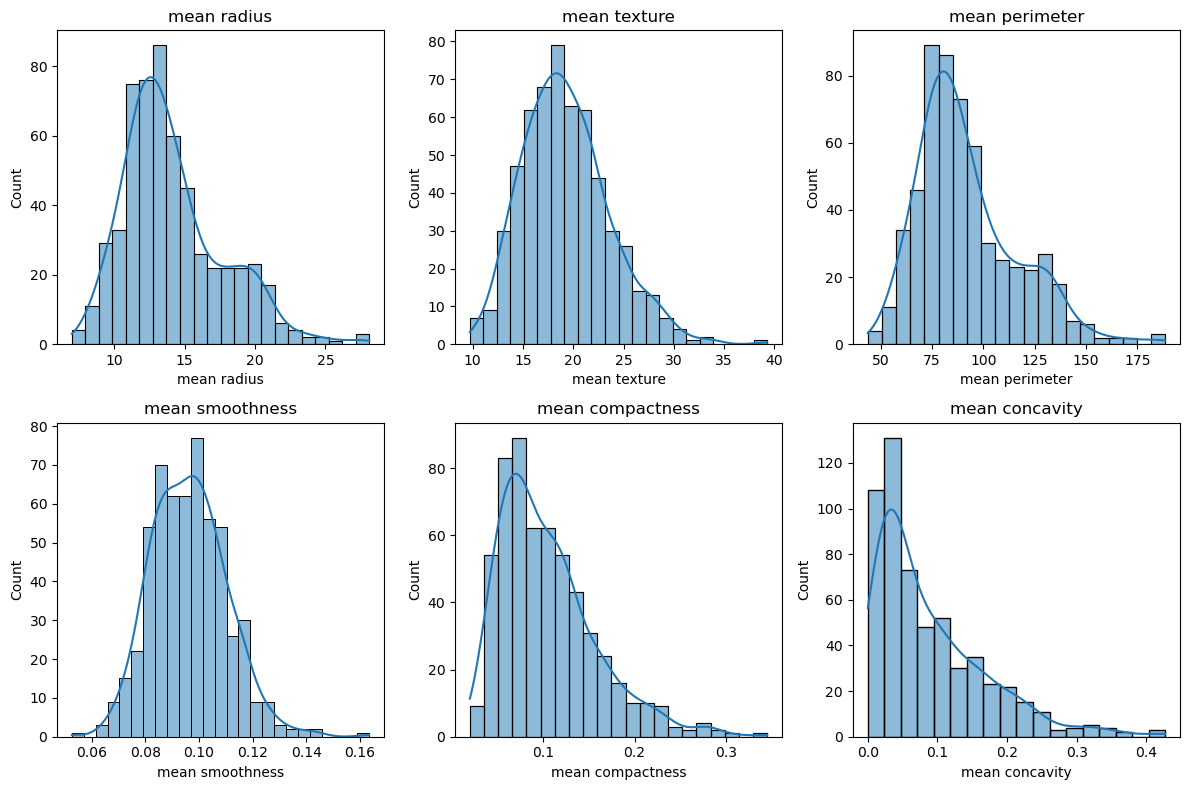

In [12]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

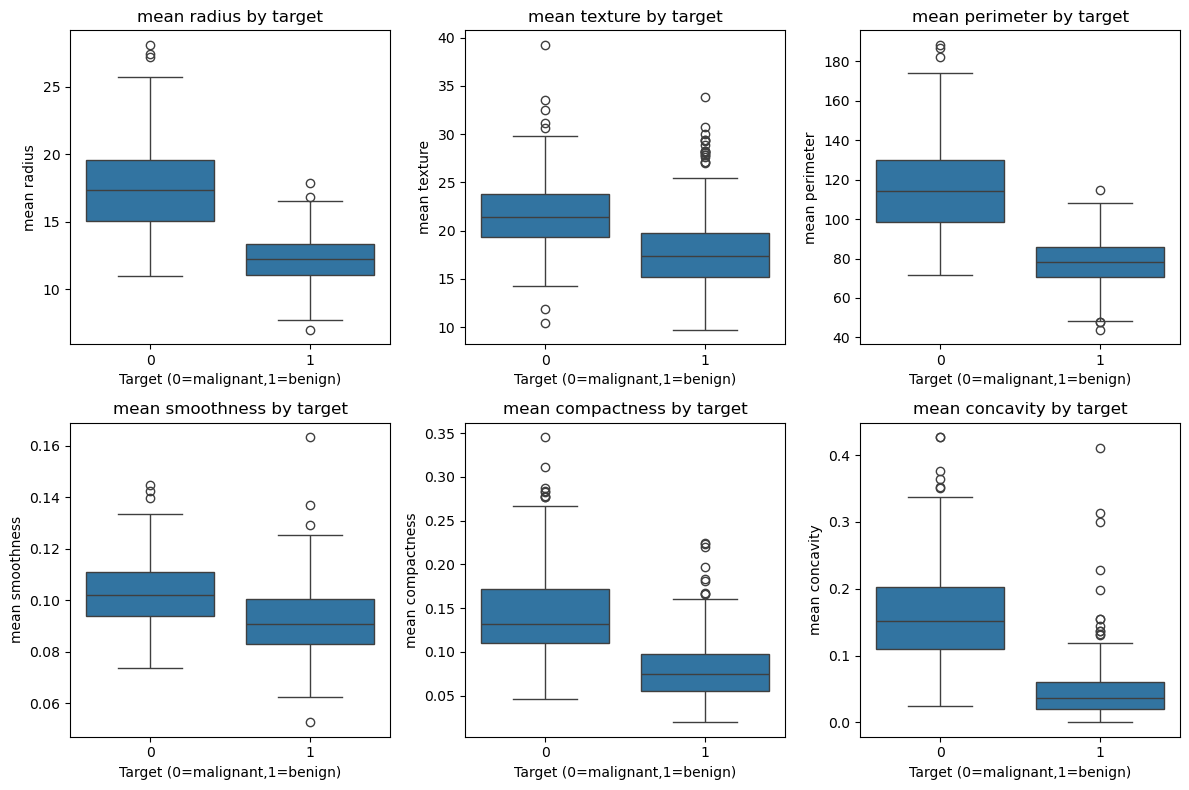

In [13]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=y, y=X[col])
    plt.xlabel('Target (0=malignant,1=benign)')
    plt.title(f"{col} by target")
plt.tight_layout()
plt.show()

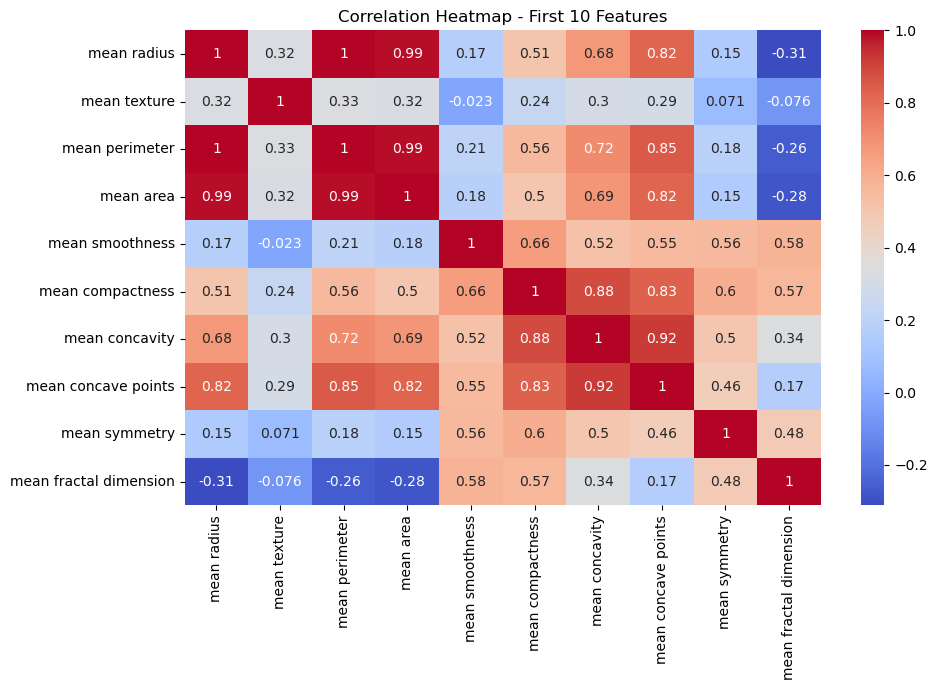

In [13]:
plt.figure(figsize=(10,7))
corr = df.iloc[:, :10].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - First 10 Features")
plt.tight_layout()
plt.show()

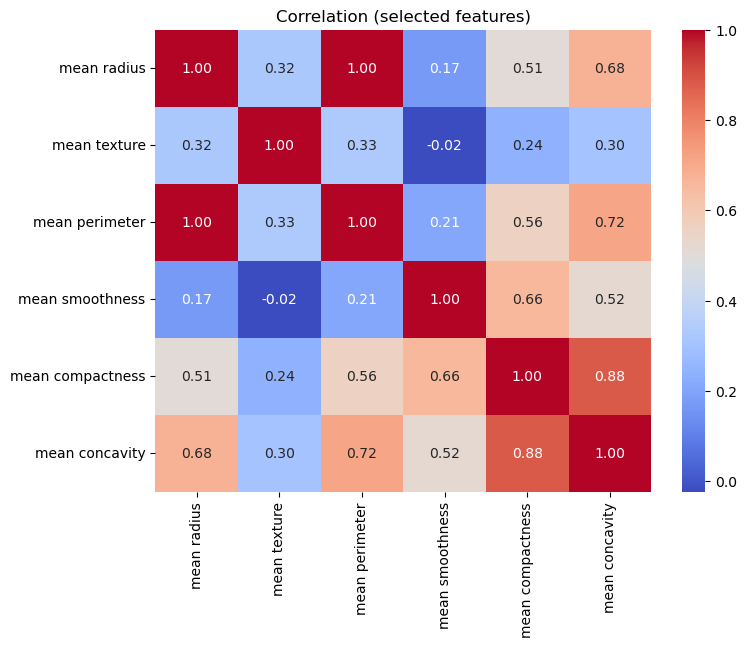

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(X[selected_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation (selected features)")
plt.show()

In [15]:
X_sel = X[selected_features].copy()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
pipeline = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='rbf', probability=True, random_state=42))])

In [18]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(probability=True, random_state=42))])

In [19]:
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc:.4f}\n")


Test Accuracy: 0.9298



In [20]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion Matrix:
[[39  3]
 [ 5 67]]


In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Classification Report:
              precision    recall  f1-score   support

   malignant       0.89      0.93      0.91        42
      benign       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



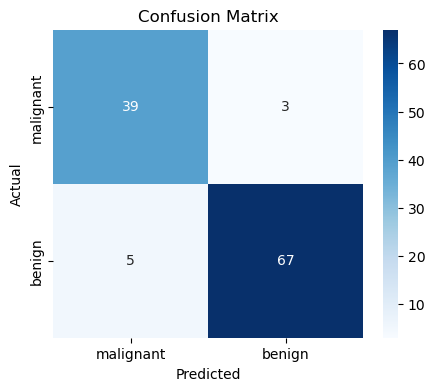

In [22]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
defaults = X_sel.mean().to_dict()

model_bundle = {
    'pipeline': pipeline,
    'feature_names': selected_features,
    'defaults': defaults,
    'target_names': list(data.target_names),
    'target_mapping': {0: data.target_names[0], 1: data.target_names[1]}}

In [24]:
joblib.dump(model_bundle, 'svm_breast_cancer_model.pkl')
print("Saved model bundle to: svm_breast_cancer_model.pkl")
print("Feature defaults (means):")
for k, v in defaults.items():
    print(f"  {k}: {v:.4f}")

Saved model bundle to: svm_breast_cancer_model.pkl
Feature defaults (means):
  mean radius: 14.1273
  mean texture: 19.2896
  mean perimeter: 91.9690
  mean smoothness: 0.0964
  mean compactness: 0.1043
  mean concavity: 0.0888
